In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [2]:
mainpath = "/Users/soldash/Documents/Tesis/python/Datos/Todas/" #ruta de Carga de los datos
filename = "hurtado_Laura.csv" #Nombre del archivo a cargar

In [3]:
data = pd.read_csv(mainpath+filename, sep=",")
data.corr()

,ECG,Seizure,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF/HF
ECG,1.000000,-0.001818,-0.113176,0.055790,0.022075,-0.003401,0.055806,0.051671,0.023209,0.024210,0.017549,0.000022
Seizure,-0.001818,1.000000,0.031045,-0.200957,-0.164398,-0.211445,-0.076892,-0.077803,-0.444180,-0.421211,-0.429597,-0.071039
RRI,-0.113176,0.031045,1.000000,0.089782,-0.279421,-0.071281,0.135392,0.147740,-0.035806,-0.067241,-0.057029,-0.057750
SDNN,0.055790,-0.200957,0.089782,1.000000,0.131034,0.292331,0.927271,0.925832,0.618277,0.605144,0.574587,-0.164835
HR,0.022075,-0.164398,-0.279421,0.131034,1.000000,0.438700,0.004787,-0.052125,0.306242,0.315926,0.297899,0.015657
HR_std,-0.003401,-0.211445,-0.071281,0.292331,0.438700,1.000000,0.208439,0.199381,0.506514,0.493406,0.498264,-0.134215
NN50,0.055806,-0.076892,0.135392,0.927271,0.004787,0.208439,1.000000,0.983992,0.455233,0.451669,0.408821,-0.172817
pNN50,0.051671,-0.077803,0.147740,0.925832,-0.052125,0.199381,0.983992,1.000000,0.442063,0.424983,0.394293,-0.183040
HF,0.023209,-0.444180,-0.035806,0.618277,0.306242,0.506514,0.455233,0.442063,1.000000,0.942033,0.975396,-0.171373
LF,0.024210,-0.421211,-0.067241,0.605144,0.315926,0.493406,0.451669,0.424983,0.942033,1.000000,0.964342,-0.096480


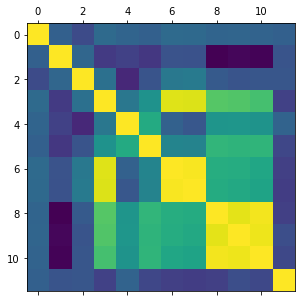

In [18]:
plt.matshow(data.corr())

In [4]:
data.shape

(1947, 13)

## Selección de caracteristicas

Hay varias técnicas que puedes utilizar para seleccionar las características más importantes para tu problema de predicción. Algunas opciones populares incluyen:

* **Selección de características basada en el modelo:** estas técnicas entrenan varios modelos utilizando diferentes combinaciones de características y luego seleccionan las características que resultan más útiles para el problema de predicción. Algunos ejemplos de estas técnicas incluyen Recursive Feature Elimination (RFE) y Wrapper Methods.

* **Selección de características basada en la importancia de las características:** estas técnicas entrenan un modelo utilizando diferentes subconjuntos de características y luego calculan la importancia de cada característica en función de cómo afecta al rendimiento del modelo. Algunos ejemplos de estas técnicas incluyen la puntuación de importancia de características de Random Forest y la importancia de las características en gradient boosting.

* **Selección de características basada en el filtro:** estas técnicas evalúan cada característica individualmente en función de alguna medida de importancia y luego seleccionan las características más importantes. Algunos ejemplos de estas técnicas incluyen la correlación de Pearson y el coeficiente de información mutua.

Para elegir la técnica más adecuada para tu problema, es importante considerar el tipo y la cantidad de datos disponibles, así como el tipo de modelo que deseas utilizar. Algunas técnicas funcionan mejor con ciertos tipos de modelos o con conjuntos de datos de ciertas características.


## Selección de características basada en el modelo

Existen muchos modelos diferentes que se pueden utilizar para implementar la selección de características en Python. Algunos de los modelos más comunes que se pueden utilizar son:

* Regresión logística
* Random Forest
* AdaBoost
* Gradient Boosting
* K-Nearest Neighbors
* Naive Bayes

### Arbol de decisión

a continuación se seleccionaron las caracterisitcas más importantes para un arbol de decisión con todas las muestras de todos los pacientes

In [16]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Carga tus datos y divide en conjuntos de entrenamiento y prueba
data_train, data_test = train_test_split(data , test_size=0.3, random_state=42)
#X = data_train[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
X = data_train[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
Y = data_train['Seizure']

feature_names = X.columns

# Crea un modelo SVM
model = DecisionTreeClassifier()

# Crea un objeto RFE y selecciona las 5 características más importantes
rfe = RFE(model, n_features_to_select=1)
rfe = rfe.fit(X, Y)

# Imprime los índices de las características seleccionadas
print(rfe.support_)

# Imprime la puntuación de importancia de cada característica
print(rfe.ranking_)

# Imprime los nombres de las características seleccionadas
print([feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]])

# Imprime el ranking y el nombre de cada característica
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {rfe.ranking_[i]}")

# Imprime el ranking y el nombre de cada característica
sorted_features = [feature for _, feature in sorted(zip(rfe.ranking_, feature_names))]
sorted_rankings = sorted(rfe.ranking_)

[False False False False False False  True False False False]
[10  7  3  2  8  9  1  4  6  5]
['HF']
RRI: 10
SDNN: 7
HR: 3
HR_std: 2
NN50: 8
pNN50: 9
HF: 1
LF: 4
Total_power: 6
LF/HF: 5


### Arbol de decisión
Unicamente usando a leguizamon_Laura.csv

In [17]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


data1 = pd.read_csv(mainpath+"leguizamon_Laura.csv", sep=",")

# Carga tus datos y divide en conjuntos de entrenamiento y prueba
data_train, data_test = train_test_split(data1 , test_size=0.3, random_state=42)

X = data_train[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
Y = data_train['Seizure']

feature_names = X.columns

# Crea un modelo SVM
model = DecisionTreeClassifier()

# Crea un objeto RFE y selecciona las 5 características más importantes
rfe = RFE(model, n_features_to_select=1)
rfe = rfe.fit(X, Y)

# Imprime los índices de las características seleccionadas
print(rfe.support_)

# Imprime la puntuación de importancia de cada característica
print(rfe.ranking_)

# Imprime los nombres de las características seleccionadas
print([feature_names[i] for i in range(len(feature_names)) if rfe.support_[i]])

# Imprime el ranking y el nombre de cada característica
for i in range(len(feature_names)):
    print(f"{feature_names[i]}: {rfe.ranking_[i]}")

# Imprime el ranking y el nombre de cada característica
sorted_features = [feature for _, feature in sorted(zip(rfe.ranking_, feature_names))]
sorted_rankings = sorted(rfe.ranking_)

[False False False False False False False  True False False]
[ 6  7  3  8 10  5  2  1  4  9]
['LF']
RRI: 6
SDNN: 7
HR: 3
HR_std: 8
NN50: 10
pNN50: 5
HF: 2
LF: 1
Total_power: 4
LF/HF: 9


### Regresión logistica

**get_dummies():** Este método toma una columna del DataFrame y devuelve un DataFrame con tantas columnas dummy como clases haya en la columna original. Cada columna dummy representa una clase y tendrá un valor de 1 si el registro correspondiente pertenece a esa clase y un valor de 0 en caso contrario.

columna llamada Seizure que tiene 3 clases: 1 para periodo normal, 2 para periodo preictal y 3 para periodo ictal. Aquí hay un ejemplo de cómo puedes obtener valores dummy de esta columna y asignarlos a una nueva variable llamada dummy_df:

(array([649.,   0.,   0.,   0.,   0., 649.,   0.,   0.,   0., 649.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

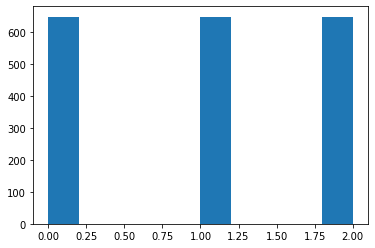

In [59]:
plt.hist(data["Seizure"])

In [60]:
dummy_df = pd.get_dummies(data, columns=['Seizure'])
dummy_df

,ECG,Time,RRI,SDNN,HR,HR_std,NN50,pNN50,HF,LF,Total_power,LF/HF,Seizure_0,Seizure_1,Seizure_2
0,70.58,2022-07-01 13:25:21.600,250,149.516015,93,1.523502,23,54.761905,2556.165206,2577.314136,8462.813786,1.008274,0,0,1
1,-69.05,2022-07-01 13:25:22.600,734,149.031722,94,1.619200,22,52.380952,3735.572625,2480.569991,9447.445421,0.664040,0,0,1
2,-659.21,2022-07-01 13:25:19.200,810,148.800724,94,1.151791,23,53.488372,2874.086866,2071.575493,8780.928966,0.720777,0,0,1
3,-112.18,2022-07-01 13:25:12.600,404,198.309652,93,0.686483,23,58.974359,3566.845519,1705.107239,9668.614265,0.478043,0,0,1
4,-43.00,2022-07-01 13:25:18.200,468,150.526518,93,0.991131,22,52.380952,3284.759258,1958.875844,9271.291105,0.596353,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,122.60,2022-07-01 18:11:47.800,604,183.853481,103,2.351215,18,40.000000,14533.503377,15609.277327,56049.232996,1.074020,1,0,0
1943,164.08,2022-07-01 18:11:30.400,1026,307.392074,107,0.709071,35,71.428571,17245.644872,20540.276750,69540.668127,1.191041,1,0,0
1944,1390.51,2022-07-01 18:11:25.400,328,311.652971,107,0.802645,31,65.957447,17838.388848,21418.651484,72044.894967,1.200705,1,0,0
1945,155.50,2022-07-01 18:11:17.800,640,256.876551,107,1.118695,28,54.901961,20598.824092,26994.734193,86458.078855,1.310499,1,0,0


Tamaño de muestras preictales :649


(array([649.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 649.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

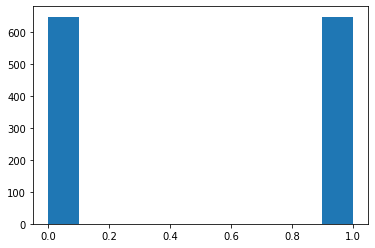

In [61]:
#Igualar muestras
sample_size = dummy_df[dummy_df["Seizure_1"] == 1].shape[0]
print("Tamaño de muestras preictales :"+ str(sample_size))

preictal = dummy_df[dummy_df["Seizure_1"] == 1]
other = dummy_df[dummy_df["Seizure_1"] == 0]

preictal_data = preictal.sample(n= sample_size)
other_data = other.sample(n= sample_size)
    
Sample = pd.concat([preictal_data, other_data], axis = 0)

plt.hist(Sample["Seizure_1"])

Para hacer la selección de características utilizando la regresión logística en Python, puedes utilizar el módulo sklearn.feature_selection y el atributo coef_ del modelo de regresión logística.

El atributo **coef_** de un modelo de regresión logística es un array que contiene los coeficientes de regresión para cada característica. Los coeficientes de regresión son una medida de la importancia de cada característica para el modelo. Las características con coeficientes más grandes tienen un mayor impacto en la predicción, mientras que las características con coeficientes más pequeños tienen un impacto menor o nulo.

Para seleccionar las características más importantes utilizando la regresión logística, puedes utilizar el método `SelectFromModel`del módulo `sklearn.feature_selection`. Este método toma un modelo de regresión logística y un umbral de selección como argumentos, y devuelve una nueva matriz de características que solo incluye las características cuyos coeficientes son superiores al **umbral de selección**.

**El threshold (umbral)** es un valor que se utiliza para determinar qué características se deben seleccionar en la selección de características. En el ejemplo de código que proporcioné en mi última respuesta, el threshold se establece en 0.25 al crear el objeto SelectFromModel.

Cuando se utiliza un modelo para la selección de características, cada característica se asigna una puntuación que representa su importancia para el modelo. El método SelectFromModel utiliza estas puntuaciones para seleccionar solo las características cuyas puntuaciones son superiores al threshold establecido.

A continuación, el modelo de regresión logística es utilizado para asignar una puntuación a cada característica. Luego, el objeto SelectFromModel se utiliza para seleccionar solo aquellas características cuyas puntuaciones son superiores a 0.25.

Es importante tener en cuenta que el threshold es un valor que se elige arbitrariamente y puede afectar el número y el tipo de características seleccionadas. Por lo general, se pueden probar diferentes valores de threshold para ver qué combinación de características da los mejores resultados para el modelo.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Carga tus datos y divide en conjuntos de entrenamiento y prueba
data_train, data_test = train_test_split(Sample , test_size=0.3, random_state=42)
#X = data_train[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
X = Sample[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
Y = Sample['Seizure_1']

feature_names = X.columns

# Crea un modelo de regresión logística
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)

# Ajusta el modelo a tus datos
logistic_regression.fit(X, Y)

# Crea un objeto SelectFromModel y establece el umbral de selección en 0.25
sfm = SelectFromModel(logistic_regression, threshold=0.25)

# Ajusta el objeto SelectFromModel a tus datos
sfm.fit(X, Y)

# Transforma el conjunto de características original utilizando el objeto SelectFromModel
X_selected = sfm.transform(X)

# Obtiene los nombres de las características seleccionadas
selected_feature_names = list(X.columns[sfm.get_support()])

# Imprime los nombres de las características seleccionadas
print(selected_feature_names)

['NN50', 'LF/HF']


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Carga tus datos y divide en conjuntos de entrenamiento y prueba
data_train, data_test = train_test_split(Sample , test_size=0.3, random_state=42)
#X = data_train[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
X = Sample[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
Y = Sample['Seizure_1']

feature_names = X.columns

# Crea un modelo de regresión logística
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)

# Ajusta el modelo a tus datos
logistic_regression.fit(X, Y)

# Crea un objeto SelectFromModel y establece el umbral de selección en 0.25
sfm = SelectFromModel(logistic_regression, threshold=0.25)

# Ajusta el objeto SelectFromModel a tus datos
sfm.fit(X, Y)

# Transforma el conjunto de características original utilizando el objeto SelectFromModel
X_selected = sfm.transform(X)

# Obtiene los nombres de las características seleccionadas
selected_feature_names = list(X.columns[sfm.get_support()])

# Imprime los nombres de las características seleccionadas
print(selected_feature_names)

['NN50', 'LF/HF']


#### Con las muestras solo para 1 paciente:

Tamaño de muestras preictales :593
['HR_std', 'LF/HF']


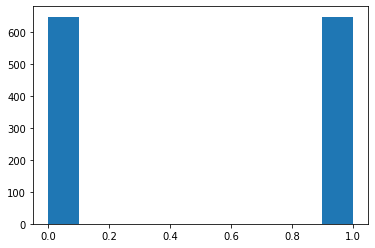

In [82]:
dummy_df1 = pd.get_dummies(data1, columns=['Seizure'])

sample_size = dummy_df1[dummy_df1["Seizure_1"] == 1].shape[0]
print("Tamaño de muestras preictales :"+ str(sample_size))

preictal = dummy_df1[dummy_df1["Seizure_1"] == 1]
other = dummy_df1[dummy_df1["Seizure_1"] == 0]

preictal_data = preictal.sample(n= sample_size)
other_data = other.sample(n= sample_size)
    
Sample1 = pd.concat([preictal_data, other_data], axis = 0)

plt.hist(Sample["Seizure_1"])

# Carga tus datos y divide en conjuntos de entrenamiento y prueba
data_train, data_test = train_test_split(Sample1 , test_size=0.3, random_state=42)
#X = data_train[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
X = Sample1[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
Y = Sample1['Seizure_1']

feature_names = X.columns

# Crea un modelo de regresión logística
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)

# Ajusta el modelo a tus datos
logistic_regression.fit(X, Y)

# Crea un objeto SelectFromModel y establece el umbral de selección en 0.25
sfm = SelectFromModel(logistic_regression, threshold=0.25)

# Ajusta el objeto SelectFromModel a tus datos
sfm.fit(X, Y)

# Transforma el conjunto de características original utilizando el objeto SelectFromModel
X_selected = sfm.transform(X)

# Obtiene los nombres de las características seleccionadas
selected_feature_names = list(X.columns[sfm.get_support()])

# Imprime los nombres de las características seleccionadas
print(selected_feature_names)

### Ramdom forest

Se utiliza el método `fit()` del modelo de Random Forest para ajustar el modelo a mis datos, luego creo un objeto `SelectFromModel` y establezco el umbral de selección en 0.25. Luego, utilizo el método `fit()` del objeto `SelectFromModel` para seleccionar las características cuyas importancias son superiores a 0.25. Finalmente, utilizo el método `transform()` para obtener una nueva matriz de características que solo incluye las características seleccionadas.


In [58]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X = data[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
y = data['Seizure']

# Crea un modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=200)

# Ajusta el modelo a tus datos
random_forest.fit(X, y)

# Crea un objeto SelectFromModel y establece el umbral de selección en 0.25
sfm = SelectFromModel(random_forest, threshold=0.13)

# Ajusta el objeto SelectFromModel a tus datos
sfm.fit(X, y)

# Transforma el conjunto de características original utilizando el objeto SelectFromModel
X_selected = sfm.transform(X)

# Obtiene los nombres de las características seleccionadas
selected_feature_names = list(X.columns[sfm.get_support()])

# Imprime los nombres de las características seleccionadas
print(selected_feature_names)


['HR', 'HF', 'Total_power']


In [65]:
# Usando los valores dummy
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X = Sample[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
y = Sample['Seizure_1']

# Crea un modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

# Ajusta el modelo a tus datos
random_forest.fit(X, y)

# Crea un objeto SelectFromModel y establece el umbral de selección en 0.25
sfm = SelectFromModel(random_forest, threshold=0.13)

# Ajusta el objeto SelectFromModel a tus datos
sfm.fit(X, y)

# Transforma el conjunto de características original utilizando el objeto SelectFromModel
X_selected = sfm.transform(X)

# Obtiene los nombres de las características seleccionadas
selected_feature_names = list(X.columns[sfm.get_support()])

# Imprime los nombres de las características seleccionadas
print(selected_feature_names)


['HR_std', 'HF', 'LF/HF']


In [66]:
# Usando solo 1 paciente
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X = data1[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
y = data1['Seizure']

# Crea un modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100)

# Ajusta el modelo a tus datos
random_forest.fit(X, y)

# Crea un objeto SelectFromModel y establece el umbral de selección en 0.25
sfm = SelectFromModel(random_forest, threshold=0.13)

# Ajusta el objeto SelectFromModel a tus datos
sfm.fit(X, y)

# Transforma el conjunto de características original utilizando el objeto SelectFromModel
X_selected = sfm.transform(X)

# Obtiene los nombres de las características seleccionadas
selected_feature_names = list(X.columns[sfm.get_support()])

# Imprime los nombres de las características seleccionadas
print(selected_feature_names)


['HR', 'LF']


### AdaBoost

AdaBoost is presented for binary classification

primero importo el módulo `SelectFromModel` y la clase `AdaBoostClassifier` de `sklearn`. Luego, creo un modelo de AdaBoost llamado `ada_boost`, lo ajusto a mis datos y creo un objeto `SelectFromModel` llamado `sfm`. Establezco el umbral de selección en 0.5 y ajusto el objeto `sfm` a mis datos. Finalmente, utilizo el método `transform()` para obtener una nueva matriz de características que solo incluye las características cuyas importancias son superiores a 0.5.


In [80]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

X = Sample[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
y = Sample['Seizure_1']

# Crea un modelo de AdaBoost
ada_boost = AdaBoostClassifier(n_estimators=1000)

# Ajusta el modelo a tus datos
ada_boost.fit(X, y)

# Crea un objeto SelectFromModel y establece el umbral de selección en 0.5
sfm = SelectFromModel(ada_boost, threshold=0.13)

# Ajusta el objeto SelectFromModel a tus datos
sfm.fit(X, y)

# Transforma el conjunto de características original utilizando el objeto SelectFromModel
X_selected = sfm.transform(X)

# Obtiene los nombres de las características seleccionadas
selected_feature_names = list(X.columns[sfm.get_support()])

# Imprime los nombres de las características seleccionadas
print(selected_feature_names)

['SDNN', 'LF', 'Total_power', 'LF/HF']


In [83]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostClassifier

X = Sample1[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
y = Sample1['Seizure_1']

# Crea un modelo de AdaBoost
ada_boost = AdaBoostClassifier(n_estimators=1000)

# Ajusta el modelo a tus datos
ada_boost.fit(X, y)

# Crea un objeto SelectFromModel y establece el umbral de selección en 0.5
sfm = SelectFromModel(ada_boost, threshold=0.13)

# Ajusta el objeto SelectFromModel a tus datos
sfm.fit(X, y)

# Transforma el conjunto de características original utilizando el objeto SelectFromModel
X_selected = sfm.transform(X)

# Obtiene los nombres de las características seleccionadas
selected_feature_names = list(X.columns[sfm.get_support()])

# Imprime los nombres de las características seleccionadas
print(selected_feature_names)

['HF', 'Total_power', 'LF/HF']


In [47]:
# Carga tus datos y divide en conjuntos de entrenamiento y prueba
data_train, data_test = train_test_split(data , test_size=0.3, random_state=42)
#X = data_train[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
X = data_train[['RRI', 'SDNN', 'HR','HR_std','NN50','pNN50','HF','LF','Total_power','LF/HF']]
Y = data_train['Seizure']

In [51]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

model = SVC(kernel='linear')

In [9]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

# Crea un objeto RFE y selecciona las 5 características más importantes
rfe = RFECV(SVR(kernel='linear'), step=1, scoring='accuracy')


In [ ]:
rfe = rfe.fit(X, Y)

In [43]:
# Imprime los índices de las características seleccionadas
print(rfe.support_)

# Imprime la puntuación de importancia de cada característica
print(rfe.ranking_)

[False False  True  True False False  True  True False  True]
[6 3 1 1 5 4 1 1 2 1]
